In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [2]:
## read the dataset
df = pd.read_csv('bitcoin.csv')

In [3]:
df.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [4]:
## remove date column
df.drop(['Date'],1,inplace=True)

In [5]:
df.head()

,Price
0,7881.846680
1,7987.371582
2,8052.543945
3,8673.215820
4,8805.778320


In [11]:
predictionDays = 30
# Create another column shifted 'n'  units up
df['Prediction'] = df[['Price']].shift(-predictionDays)
# show the first 5 rows
df.head()

,Price,Prediction
0,7881.846680,10701.69141
1,7987.371582,10855.37109
2,8052.543945,11011.10254
3,8673.215820,11790.91699
4,8805.778320,13016.23145


<AxesSubplot:>

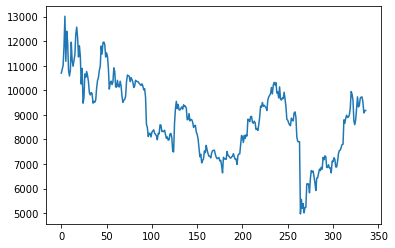

In [18]:
df['Prediction'].plot()



<AxesSubplot:>

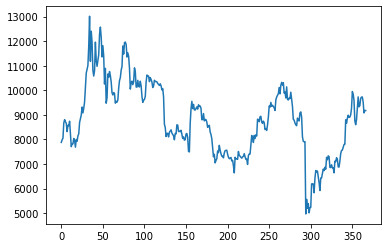

In [17]:
df.Price.plot()

In [7]:
df.tail()

,Price,Prediction
362,9729.038086,NaN
363,9522.981445,NaN
364,9081.761719,NaN
365,9182.577148,NaN
366,9180.045898,NaN


In [19]:
# Create the independent dada set
# Here we will convert the data frame into a numpy array and drp the prediction column
x = np.array(df.drop(['Prediction'],1))
# Remove the last 'n' rows where 'n' is the predictionDays
x = x[:len(df)-predictionDays]
print(x)

[[ 7881.84668 ]
 [ 7987.371582]
 [ 8052.543945]
 [ 8673.21582 ]
 [ 8805.77832 ]
 [ 8719.961914]
 [ 8659.487305]
 [ 8319.472656]
 [ 8574.501953]
 [ 8564.016602]
 [ 8742.958008]
 [ 8208.995117]
 [ 7707.770996]
 [ 7824.231445]
 [ 7822.023438]
 [ 8043.951172]
 [ 7954.12793 ]
 [ 7688.077148]
 [ 8000.32959 ]
 [ 7927.714355]
 [ 8145.857422]
 [ 8230.923828]
 [ 8693.833008]
 [ 8838.375   ]
 [ 8994.488281]
 [ 9320.352539]
 [ 9081.762695]
 [ 9273.521484]
 [ 9527.160156]
 [10144.55664 ]
 [10701.69141 ]
 [10855.37109 ]
 [11011.10254 ]
 [11790.91699 ]
 [13016.23145 ]
 [11182.80664 ]
 [12407.33203 ]
 [11959.37109 ]
 [10817.15527 ]
 [10583.13477 ]
 [10801.67773 ]
 [11961.26953 ]
 [11215.4375  ]
 [10978.45996 ]
 [11208.55078 ]
 [11450.84668 ]
 [12285.95801 ]
 [12573.8125  ]
 [12156.5127  ]
 [11358.66211 ]
 [11815.98633 ]
 [11392.37891 ]
 [10256.05859 ]
 [10895.08984 ]
 [ 9477.641602]
 [ 9693.802734]
 [10666.48242 ]
 [10530.73242 ]
 [10767.13965 ]
 [10599.10547 ]
 [10343.10645 ]
 [ 9900.767578]
 [ 9811.

In [20]:
# Create the dependent data set
# convert the data frame into a numpy array
y = np.array(df['Prediction'])
# Get all the values except last 'n' rows
y = y[:-predictionDays]
print(y)

[10701.69141  10855.37109  11011.10254  11790.91699  13016.23145
 11182.80664  12407.33203  11959.37109  10817.15527  10583.13477
 10801.67773  11961.26953  11215.4375   10978.45996  11208.55078
 11450.84668  12285.95801  12573.8125   12156.5127   11358.66211
 11815.98633  11392.37891  10256.05859  10895.08984   9477.641602
  9693.802734 10666.48242  10530.73242  10767.13965  10599.10547
 10343.10645   9900.767578  9811.925781  9911.841797  9870.303711
  9477.677734  9552.860352  9519.145508  9607.423828 10085.62793
 10399.66895  10518.17481  10821.72656  10970.18457  11805.65332
 11478.16895  11941.96875  11966.40723  11862.93652  11354.02441
 11523.5791   11382.61621  10895.83008  10051.7041   10311.5459
 10374.33887  10231.74414  10345.81055  10916.05371  10763.23242
 10138.04981  10131.05566  10407.96484  10159.96094  10138.51758
 10370.82031  10185.5       9754.422852  9510.200195  9598.173828
  9630.664063  9757.970703 10346.76074  10623.54004  10594.49316
 10575.5332   10353.302

In [21]:
## train test split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

# set the predictionDays array equal to last 30 rows from the original data set
predictionDays_array = np.array(df.drop(['Prediction'],1))[-predictionDays:]
print(predictionDays_array)

[[7550.900879]
 [7569.936035]
 [7679.867188]
 [7795.601074]
 [7807.058594]
 [8801.038086]
 [8658.553711]
 [8864.766602]
 [8988.59668 ]
 [8897.46875 ]
 [8912.654297]
 [9003.070313]
 [9268.761719]
 [9951.518555]
 [9842.666016]
 [9593.896484]
 [8756.430664]
 [8601.795898]
 [8804.477539]
 [9269.987305]
 [9733.72168 ]
 [9328.197266]
 [9377.013672]
 [9670.739258]
 [9726.575195]
 [9729.038086]
 [9522.981445]
 [9081.761719]
 [9182.577148]
 [9180.045898]]


In [11]:
## SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(xtrain, ytrain)

SVR(C=1000.0, gamma=1e-05)

In [12]:
## testing
svr_rbf_confidence = svr_rbf.score(xtest,ytest)
print('SVR_RBF accuracy :',svr_rbf_confidence)

SVR_RBF accuracy : 0.10483555816193968


In [13]:
# print the predicted values
svm_prediction = svr_rbf.predict(xtest)
print(svm_prediction)
print()
print(ytest)

[ 8899.75934118  9074.70026068  9159.43922686  8294.55189855
  8088.69618409  8622.27297559  8553.01936174  9990.15833414
  9743.77915114  9733.25602523  8656.0798524   7556.06292945
  9338.00461242  8246.95841875  9598.05436463  8432.94650726
  8298.967537    9077.18032433  8811.17924845 10505.94594996
  7797.48045507  8723.68714064  8336.52869225  8433.91874229
  8498.70473915  8387.31787724  8878.29942748  7784.06862311
  8990.52226144 10260.79785528  8284.72112669  9951.75637923
  8748.69737447  9500.46481393  8414.3968582   8785.37841866
  7471.59255689  8625.94668628  8952.75971952  7721.03560447
  7720.28583711  8417.59998438  8300.11131918  8553.59556032
  9012.44309737  9229.36767914 10433.56560941  9871.00433483
  8763.8922606   9637.69057704  7848.70807391  9095.16718993
  9107.13499061  7863.769086    8694.55904366  8948.05478838
  8946.74009497  9122.86164908  7776.90731849  9793.10605418
  8631.50455083 10830.52513876  8583.5056108   7783.9328566
  8093.83674298  9343.913

In [22]:
# Print the model predictions for the next 30 days
svm_prediction = svr_rbf.predict(predictionDays_array)
print(svm_prediction)
print()
#Print the actual price for bitcoin for last 30 days
print(df.tail(predictionDays))

NameError: name 'svr_rbf' is not defined